<a href="https://colab.research.google.com/github/PouyaZr/Detect-Fire-MLP/blob/master/MLP_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download phylake1337/fire-dataset

 95% 369M/387M [00:15<00:00, 22.7MB/s]
100% 387M/387M [00:15<00:00, 26.6MB/s]


In [6]:
import zipfile

ZIP = zipfile.ZipFile('/content/fire-dataset.zip', 'r')
ZIP.extractall()
ZIP.close()

In [7]:
!rm -rf fire-dataset.zip

In [42]:
import cv2
import glob
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [16]:
data = []
labels = []

i = 0
for item in glob.glob('fire_dataset/*/*'):

  i += 1

  img = cv2.imread(item)
  try:
    r_img = cv2.resize(img, (32, 32)).flatten()
  except:
    continue
  data.append(r_img)

  label = item.split('/')[-1]
  label = label.split('.')[0]

  labels.append(label)

  if i % 100 == 0:
    print(f"[INFO]: {i}/1000 processed")

le = LabelEncoder()
labels = le.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data)/255.0

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

[INFO]: 100/1000 processed
[INFO]: 200/1000 processed
[INFO]: 300/1000 processed
[INFO]: 400/1000 processed
[INFO]: 500/1000 processed
[INFO]: 600/1000 processed
[INFO]: 700/1000 processed
[INFO]: 800/1000 processed
[INFO]: 900/1000 processed


In [17]:
net = models.Sequential([
                         layers.Dense(300, input_dim=3072, activation='relu'),
                         layers.Dense(40, activation='relu'),
                         layers.Dense(2, activation='softmax')
                         ])

In [18]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               921900    
                                                                 
 dense_4 (Dense)             (None, 40)                12040     
                                                                 
 dense_5 (Dense)             (None, 2)                 82        
                                                                 
Total params: 934,022
Trainable params: 934,022
Non-trainable params: 0
_________________________________________________________________


In [19]:
net.compile(optimizer = 'SGD',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [20]:
H = net.fit(X_train, y_train, batch_size=16, epochs=40, validation_data=(X_test, y_test))
net.save('mlp.h5')

Epoch 1/40
50/50 [==============================] - 1s 8ms/step - loss: 0.4653 - accuracy: 0.7669 - val_loss: 0.3661 - val_accuracy: 0.8200
Epoch 2/40
50/50 [==============================] - 0s 5ms/step - loss: 0.3547 - accuracy: 0.8396 - val_loss: 0.3116 - val_accuracy: 0.8350
Epoch 3/40
50/50 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.8759 - val_loss: 0.2823 - val_accuracy: 0.8500
Epoch 4/40
50/50 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.9010 - val_loss: 0.3065 - val_accuracy: 0.8800
Epoch 5/40
50/50 [==============================] - 0s 5ms/step - loss: 0.2261 - accuracy: 0.9211 - val_loss: 0.2207 - val_accuracy: 0.9200
Epoch 6/40
50/50 [==============================] - 0s 5ms/step - loss: 0.2095 - accuracy: 0.9273 - val_loss: 0.2000 - val_accuracy: 0.9250
Epoch 7/40
50/50 [==============================] - 0s 5ms/step - loss: 0.1894 - accuracy: 0.9323 - val_loss: 0.2433 - val_accuracy: 0.8950
Epoch 8/40
50/50 [==

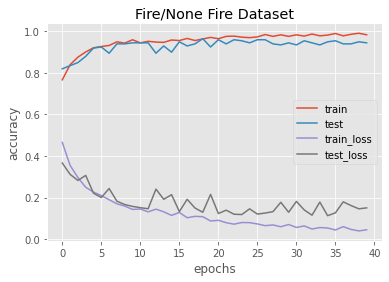

In [21]:
plt.style.use('ggplot')
plt.plot(H.history['accuracy'], label = 'train')
plt.plot(H.history['val_accuracy'], label = 'test')
plt.plot(H.history['loss'], label = 'train_loss')
plt.plot(H.history['val_loss'], label = 'test_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Fire/None Fire Dataset')
plt.show()

In [47]:
ZIP = zipfile.ZipFile('/content/Val_img.zip', 'r')
ZIP.extractall()
ZIP.close()
!rm -rf Val_img.zip

In [37]:
from google.colab.patches import cv2_imshow
net = models.load_model('mlp.h5')
labels = ['fire', 'non fire']

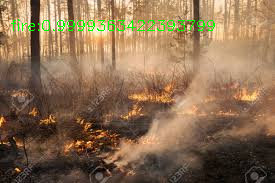

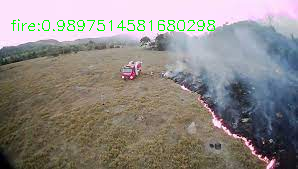

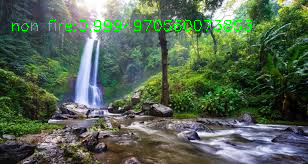

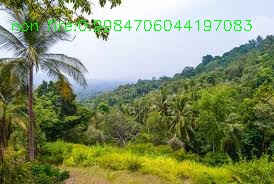

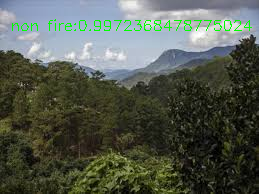

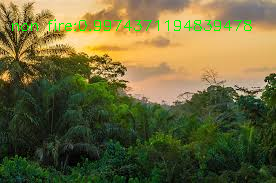

In [48]:
for item in glob.glob('Val_img/*'):
  img = cv2.imread(item)
  r_img = cv2.resize(img, (32, 32)).flatten()
  r_img = r_img/255.0

  out = net.predict(np.array([r_img]))[0]
  pred = np.argmax(out)

  # print(labels[pred])
  cv2.putText(img, f"{labels[pred]}:{out[pred]}",(10, 30), cv2.FONT_HERSHEY_SIMPLEX,
              0.5, (0, 255, 0), 1)
  
  cv2_imshow (img) 